In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

**Data Exploration**

In [2]:
# Load the datasets
shopping_behavior = pd.read_csv('shopping_behavior_updated.csv')
shopping_trends = pd.read_csv('shopping_trends.csv')

# Display the first few rows of each dataset to understand their structure
print("First few rows of shopping_behavior dataset:")
print(shopping_behavior.head())

print("\nFirst few rows of shopping_trends dataset:")
print(shopping_trends.head())



First few rows of shopping_behavior dataset:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping

In [3]:
# Display summary statistics for each dataset
print("\nSummary statistics of shopping_behavior dataset:")
print(shopping_behavior.describe(include='all'))

print("\nSummary statistics of shopping_trends dataset:")
print(shopping_trends.describe(include='all'))


Summary statistics of shopping_behavior dataset:
        Customer ID          Age Gender Item Purchased  Category  \
count   3900.000000  3900.000000   3900           3900      3900   
unique          NaN          NaN      2             25         4   
top             NaN          NaN   Male         Blouse  Clothing   
freq            NaN          NaN   2652            171      1737   
mean    1950.500000    44.068462    NaN            NaN       NaN   
std     1125.977353    15.207589    NaN            NaN       NaN   
min        1.000000    18.000000    NaN            NaN       NaN   
25%      975.750000    31.000000    NaN            NaN       NaN   
50%     1950.500000    44.000000    NaN            NaN       NaN   
75%     2925.250000    57.000000    NaN            NaN       NaN   
max     3900.000000    70.000000    NaN            NaN       NaN   

        Purchase Amount (USD) Location  Size  Color  Season  Review Rating  \
count             3900.000000     3900  3900   3900    

In [4]:
# Check for missing values in both datasets
missing_values_behavior = shopping_behavior.isnull().sum()
missing_values_trends = shopping_trends.isnull().sum()


In [5]:
print("Missing values in shopping_behavior dataset:")
print(missing_values_behavior)


Missing values in shopping_behavior dataset:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [6]:
print("\nMissing values in shopping_trends dataset:")
print(missing_values_trends)



Missing values in shopping_trends dataset:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [7]:
# Data types and basic info
print("\nInfo of shopping_behavior dataset:")
print(shopping_behavior.info())

print("\nInfo of shopping_trends dataset:")
print(shopping_trends.info())



Info of shopping_behavior dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Prom

**Exploratory Data Analysis**

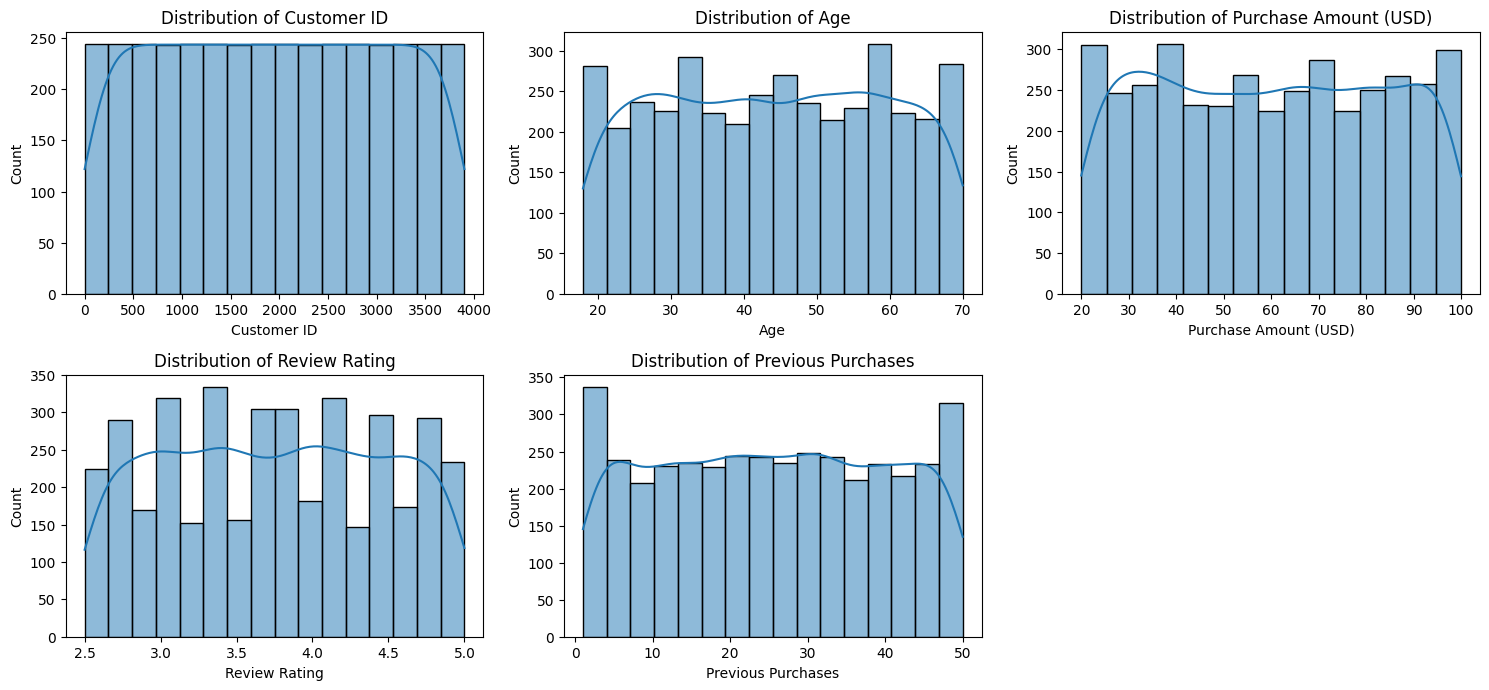

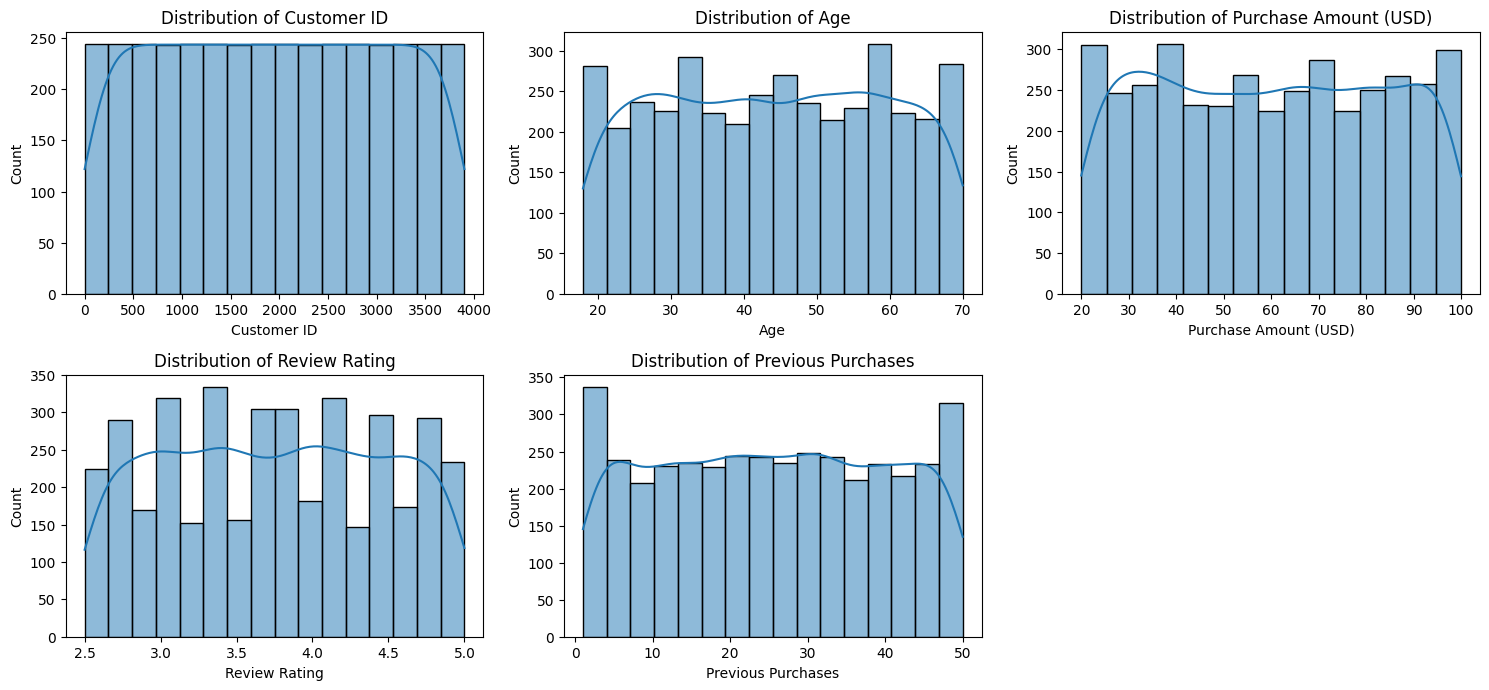

In [8]:
# Visualize distributions of numerical features
numerical_features_behavior = shopping_behavior.select_dtypes(include=[np.number]).columns.tolist()
numerical_features_trends = shopping_trends.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features_behavior):
    plt.subplot(3, 3, i+1)
    sns.histplot(shopping_behavior[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features_trends):
    plt.subplot(3, 3, i+1)
    sns.histplot(shopping_trends[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

**Data Cleaning**

In [9]:
# Drop any duplicate columns that may be present in the datasets
shopping_behavior = shopping_behavior.loc[:, ~shopping_behavior.columns.duplicated()]
shopping_trends = shopping_trends.loc[:, ~shopping_trends.columns.duplicated()]

In [10]:
# Standardize column names if needed
# Rename columns in shopping_trends to match shopping_behavior if necessary
shopping_trends.rename(columns={
    'Preferred Payment Method': 'Payment Method'
}, inplace=True)


In [11]:
# Check for any remaining columns that need to be standardized
print("\nColumns in shopping_behavior dataset:")
print(shopping_behavior.columns)

print("\nColumns in shopping_trends dataset:")
print(shopping_trends.columns)


Columns in shopping_behavior dataset:
Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

Columns in shopping_trends dataset:
Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')


In [12]:
# Merge the datasets on 'Customer ID'
merged_data = pd.merge(shopping_behavior, shopping_trends, on='Customer ID', how='inner', suffixes=('_behavior', '_trends'))


In [13]:
# Drop any duplicate columns resulting from the merge
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

In [14]:
# Check for duplicates in the merged dataset
duplicates = merged_data.duplicated().sum()
print(f"\nNumber of duplicate rows in the merged dataset: {duplicates}")



Number of duplicate rows in the merged dataset: 0


**Data Preprocessing**

In [15]:
# Handle missing values by imputing with mean for numerical and mode for categorical columns
num_features = ['Age_behavior', 'Purchase Amount (USD)_behavior', 'Review Rating_behavior', 'Previous Purchases_behavior']
cat_features = ['Gender_behavior', 'Item Purchased_behavior', 'Category_behavior', 'Location_behavior', 'Size_behavior', 'Color_behavior', 'Season_behavior', 'Subscription Status_behavior', 'Shipping Type_behavior', 'Discount Applied_behavior', 'Promo Code Used_behavior', 'Payment Method_behavior', 'Frequency of Purchases_behavior']


In [16]:
# Preprocessing pipeline for numerical features
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [17]:
# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ])

# Apply the transformations to the merged dataset
X_preprocessed = preprocessor.fit_transform(merged_data)

# Convert the preprocessed data back to a DataFrame
X_preprocessed_df = pd.DataFrame(X_preprocessed.toarray(), columns=preprocessor.get_feature_names_out())


In [18]:
# Save the preprocessed dataset
X_preprocessed_df.to_csv('preprocessed_data.csv', index=False)

**Model Training and Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

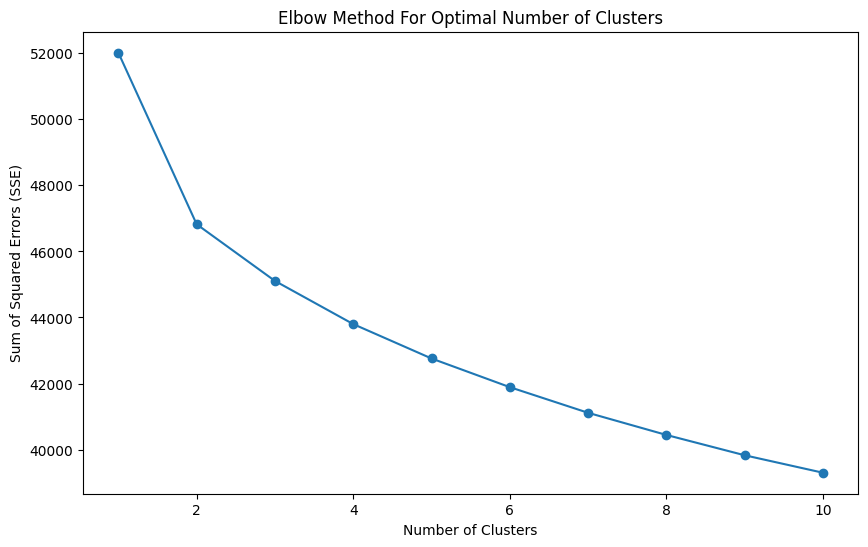

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
preprocessed_data = pd.read_csv('preprocessed_data.csv')

# Determine the optimal number of clusters for K-Means using the Elbow Method
def plot_elbow_method(data, max_clusters=10):
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method For Optimal Number of Clusters')
    plt.show()

plot_elbow_method(preprocessed_data)

# Apply K-Means clustering with the chosen number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(preprocessed_data)
preprocessed_data['KMeans_Cluster'] = kmeans_labels

# Apply Mean-Shift clustering
bandwidth = estimate_bandwidth(preprocessed_data, quantile=0.2, n_samples=500)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_labels = meanshift.fit_predict(preprocessed_data)
preprocessed_data['MeanShift_Cluster'] = meanshift_labels

# Save the clustered data for further analysis
preprocessed_data.to_csv('clustered_data.csv', index=False)


**Cluster Analysis and Visualization**

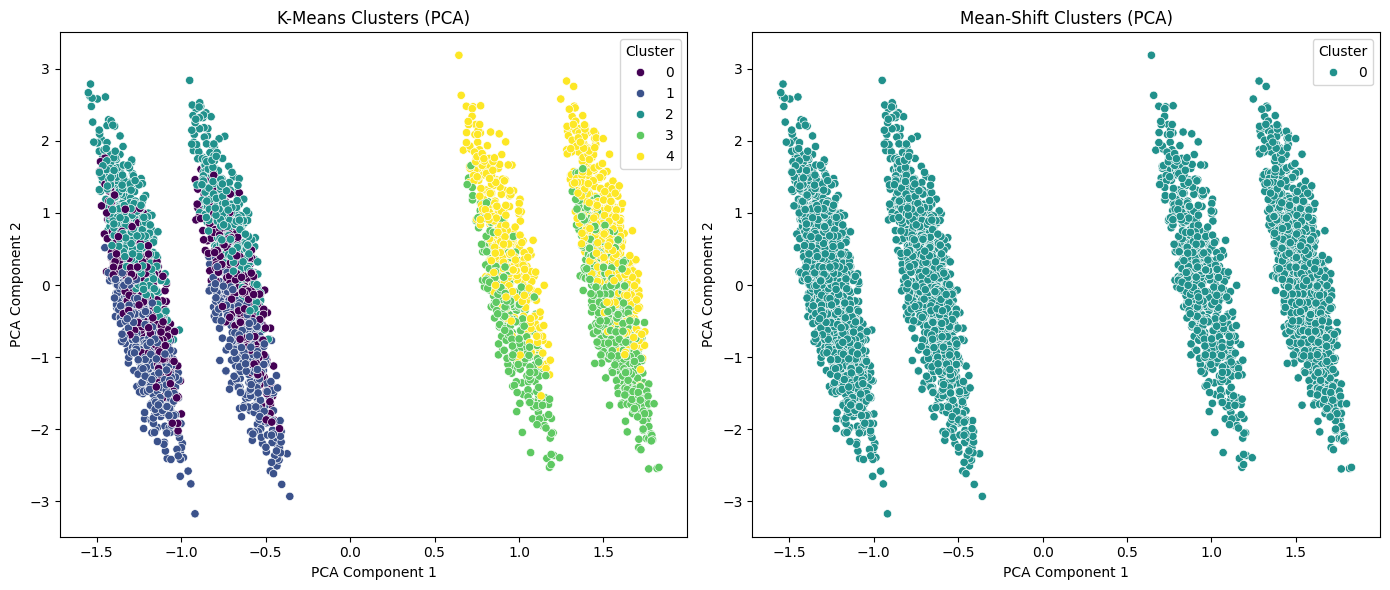


Cluster Analysis for KMeans_Cluster:
                num__Age_behavior  num__Purchase Amount (USD)_behavior  \
KMeans_Cluster                                                           
0                        0.700978                             0.222485   
1                        0.452378                            -0.258639   
2                       -1.044627                             0.112107   
3                        0.881323                             0.016962   
4                       -0.868139                            -0.057812   

                num__Review Rating_behavior  num__Previous Purchases_behavior  \
KMeans_Cluster                                                                  
0                                  0.831983                          0.274178   
1                                 -0.943213                         -0.060555   
2                                  0.262938                         -0.227970   
3                                  0.0

In [20]:
# Load the clustered data
clustered_data = pd.read_csv('clustered_data.csv')

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(clustered_data.drop(columns=['KMeans_Cluster', 'MeanShift_Cluster']))

plt.figure(figsize=(14, 6))

# K-Means Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=clustered_data['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')

# Mean-Shift Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=clustered_data['MeanShift_Cluster'], palette='viridis')
plt.title('Mean-Shift Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

# Analyze the characteristics of each cluster
def analyze_clusters(data, cluster_column):
    cluster_analysis = data.groupby(cluster_column).mean()
    print(f"\nCluster Analysis for {cluster_column}:")
    print(cluster_analysis)

analyze_clusters(clustered_data, 'KMeans_Cluster')
analyze_clusters(clustered_data, 'MeanShift_Cluster')


Train a Classification Model for Prediction

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare the data by selecting features and target (KMeans_Cluster or MeanShift_Cluster)
X = preprocessed_data.drop(columns=['KMeans_Cluster', 'MeanShift_Cluster'])
y_kmeans = preprocessed_data['KMeans_Cluster']
y_meanshift = preprocessed_data['MeanShift_Cluster']

# Split the data into training and testing sets for K-Means cluster prediction
X_train_kmeans, X_test_kmeans, y_train_kmeans, y_test_kmeans = train_test_split(X, y_kmeans, test_size=0.2, random_state=42)

# Train a Random Forest Classifier to predict K-Means Clusters
rf_kmeans = RandomForestClassifier(random_state=42)
rf_kmeans.fit(X_train_kmeans, y_train_kmeans)

# Make predictions on the test set
y_pred_kmeans = rf_kmeans.predict(X_test_kmeans)

# Evaluate the model
print("K-Means Cluster Prediction - Classification Report:")
print(classification_report(y_test_kmeans, y_pred_kmeans))

print("K-Means Cluster Prediction - Accuracy Score:")
print(accuracy_score(y_test_kmeans, y_pred_kmeans))

# Repeat the process for Mean-Shift Clusters
X_train_meanshift, X_test_meanshift, y_train_meanshift, y_test_meanshift = train_test_split(X, y_meanshift, test_size=0.2, random_state=42)

# Train a Random Forest Classifier to predict Mean-Shift Clusters
rf_meanshift = RandomForestClassifier(random_state=42)
rf_meanshift.fit(X_train_meanshift, y_train_meanshift)

# Make predictions on the test set
y_pred_meanshift = rf_meanshift.predict(X_test_meanshift)

# Evaluate the model
print("Mean-Shift Cluster Prediction - Classification Report:")
print(classification_report(y_test_meanshift, y_pred_meanshift))

print("Mean-Shift Cluster Prediction - Accuracy Score:")
print(accuracy_score(y_test_meanshift, y_pred_meanshift))


K-Means Cluster Prediction - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       118
           1       0.97      0.94      0.95       154
           2       0.92      0.96      0.94       150
           3       0.98      0.99      0.99       177
           4       0.99      0.98      0.99       181

    accuracy                           0.96       780
   macro avg       0.96      0.96      0.96       780
weighted avg       0.96      0.96      0.96       780

K-Means Cluster Prediction - Accuracy Score:
0.9628205128205128
Mean-Shift Cluster Prediction - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       780

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780

Mean-Shift Cluster Prediction - Accuracy Score:
1.0


2. Predicting the Cluster for New Customers

In [22]:
# Example new customer data (assuming similar preprocessing as before)
new_customer = pd.DataFrame({
    'Age_behavior': [30],
    'Purchase Amount (USD)_behavior': [150],
    'Review Rating_behavior': [4.5],
    'Previous Purchases_behavior': [10],
    'Gender_behavior': ['Female'],
    'Item Purchased_behavior': ['Dress'],
    'Category_behavior': ['Clothing'],
    'Location_behavior': ['New York'],
    'Size_behavior': ['M'],
    'Color_behavior': ['Blue'],
    'Season_behavior': ['Summer'],
    'Subscription Status_behavior': ['Yes'],
    'Shipping Type_behavior': ['Free Shipping'],
    'Discount Applied_behavior': ['No'],
    'Promo Code Used_behavior': ['No'],
    'Payment Method_behavior': ['Credit Card'],
    'Frequency of Purchases_behavior': ['Monthly']
})

# Apply the same preprocessing to the new customer data
new_customer_processed = preprocessor.transform(new_customer)

# Predict the cluster for the new customer using both models
predicted_kmeans_cluster = rf_kmeans.predict(new_customer_processed)
predicted_meanshift_cluster = rf_meanshift.predict(new_customer_processed)

print(f"Predicted K-Means Cluster for the new customer: {predicted_kmeans_cluster[0]}")
print(f"Predicted Mean-Shift Cluster for the new customer: {predicted_meanshift_cluster[0]}")


Predicted K-Means Cluster for the new customer: 2
Predicted Mean-Shift Cluster for the new customer: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
